|Branch	        |PPAC	                            |code
|:---           |       :---:                       |---:
|PPACF8[0][0]	|PPAC 1 Layer A X (mm)	            |x[0]
|PPACF8[0][1]	|PPAC 1 Layer A Y (mm)	            |y[0]
|PPACF8[0][2]	|PPAC 1 Layer A Z for X-plan (mm)	|$z_x$[0]
|PPACF8[0][3]	|PPAC 1 Layer A Z for Y-plan (mm)	|$z_y$[0]
|PPACF8[0][4]	|PPAC 1 Layer A Anode time (ns)	    |$t[0]$
|PPACF8[1][0]	|PPAC 1 Layer B X (mm)	            |$x[1]$
|PPACF8[1][1]	|PPAC 1 Layer B Y (mm)	            |$y[1]$
|PPACF8[1][2]	|PPAC 1 Layer B Z for X-plan (mm)	|$z_x[1]$
|PPACF8[1][3]	|PPAC 1 Layer B Z for Y-plan (mm)	|$z_y[1]$
|PPACF8[1][4]	|PPAC 1 Layer B Anode time (ns)     |$t[1]$
|PPACF8[2][0-4]	|PPAC 2 Layer A *	                |x[2],y[2],$z_x$[2],$z_y$[2]
|PPACF8[3][0-4]	|PPAC 2 Layer B *                   |$x[3]$,$y[3]$,$z_{x}[3]$,$z_{y}[3]$
|PPACF8[4][0-4]	|PPAC 3 *	                        |$x$[4],$y$[4],$z_x$[4],$z_y$[4]


# 判断思路

为检查能否输出赋值k，k初值为0，PPAC1A可以作为输出就给其加2^0,B就加2^1，PPAC2A就加2^2，PPAC2B就加2^3,PPAC3就加2^4，如此，就可以通过k值来判断是否可以读还能判断是哪个板子可读。如10001，就指PPAC3和PPAC1A可读。也就是说，k为0时，指没有板子可读，为2^n时，就指只有一个PPAC板上的值可读，为2^(2n+1)+2^(2n)时只在一个板子上可读

In [ ]:
//TFile *ipf = new TFile("f8ppac001.root");  
//TTree *tree = (TTree*)  ipf->Get("tree"); 
//tree->MakeClass("f8ppac001"); 

In [1]:
//%jsroot on
//gROOT->ProcessLine(".L f8ppac001.C"); 
//gROOT->ProcessLine("f8ppac001 rt");  
//rt.loop(); 

(f8ppac001 &) @0x7f474d398018


PPAC1的板子好用记1，PPAC2的板子好用记4，PPAC3的板子好用记16，由此可知只有$k\leq 4$和$k=8,16$时才不符合要求。

In [1]:
TFile *File = new TFile("tracking.root"); 
TTree *Data = (TTree*)File->Get("tree"); 

Double_t Fitxk, Fitxb, Fityk, Fityb, x[5], z_x[5],  y[5], z_y[5]; 
Int_t must2Trig, beamTrig; 
Long64_t NEntry = Data -> GetEntries(); 
Data -> SetBranchAddress("z_x", &z_x); 
Data -> SetBranchAddress("x", &x); 
Data -> SetBranchAddress("z_y", &z_y); 
Data -> SetBranchAddress("y", &y); 
Data -> SetBranchAddress("Fitxk", &Fitxk); 
Data -> SetBranchAddress("Fitxb", &Fitxb); 
Data -> SetBranchAddress("Fityk", &Fityk); 
Data -> SetBranchAddress("Fityb", &Fityb); 
Data -> SetBranchAddress("must2Trig", &must2Trig); 
Data -> SetBranchAddress("beamTrig", &beamTrig); 


$$x + z = 0$$
$$x=k_{xz}+b_{x}$$
$$y=k_{yz}+b_y$$

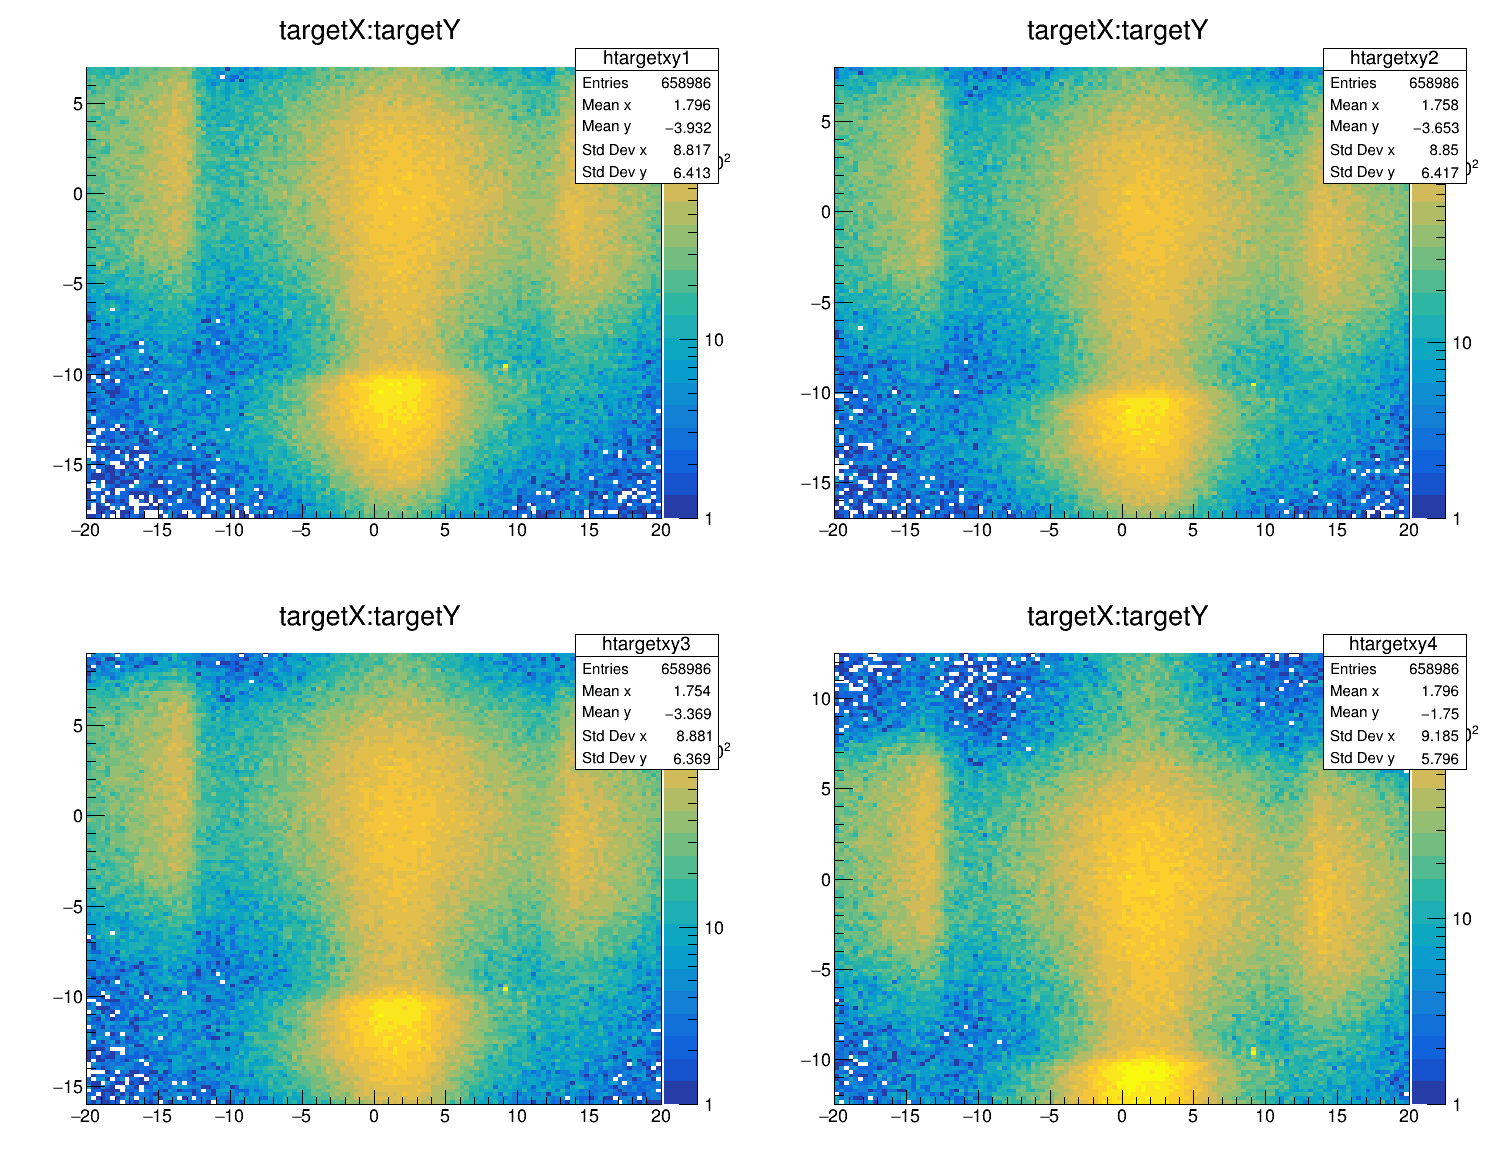

Warning in <TFile::Append>: Replacing existing TH1: htargetxy1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: htargetxy2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: htargetxy3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: htargetxy4 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: ctargetXY


In [3]:
TH2D *htargetxy1 = new TH2D("htargetxy1", "targetX:targetY", 120, -20, 20, 120, -18, 7); 
TH2D *htargetxy2 = new TH2D("htargetxy2", "targetX:targetY", 120, -20, 20, 120, -17, 8); 
TH2D *htargetxy3 = new TH2D("htargetxy3", "targetX:targetY", 120, -20, 20, 120, -16, 9); 
TH2D *htargetxy4 = new TH2D("htargetxy4", "targetX:targetY", 120, -20, 20, 120, -12.5, 12.5); 

for(Long64_t j = 0; j < NEntry; j++){
    Data -> GetEntry(j); 
    if((1+Fitxk != 0) && (Fitxk != 999) && (Fityk != 999))   htargetxy2 -> Fill(Fitxb/(1+Fitxk), Fitxb*Fityk/(1+Fitxk)+Fityb); 
    if((1+Fitxk != 0) && (Fitxk != 999) && (Fityk != 999))   htargetxy1 -> Fill(Fitxb/(1+Fitxk), Fitxb*Fityk/(1+Fitxk)+Fityb); 
    if((1+Fitxk != 0) && (Fitxk != 999) && (Fityk != 999))   htargetxy4 -> Fill(Fitxb/(1+Fitxk), Fitxb*Fityk/(1+Fitxk)+Fityb); 
    if((1+Fitxk != 0) && (Fitxk != 999) && (Fityk != 999))   htargetxy3 -> Fill(Fitxb/(1+Fitxk), Fitxb*Fityk/(1+Fitxk)+Fityb); 
}

TCanvas *ctargetXY = new TCanvas("ctargetXY", "ctargetXY", 1500, 1200); 
ctargetXY -> Divide(2, 2); 

ctargetXY -> cd(1); 
htargetxy1 -> Draw("colz"); 
htargetxy1 -> SetMinimum(1); 
ctargetXY -> cd(1) -> SetLogz(); 

ctargetXY -> cd(2); 
ctargetXY -> cd(2) -> SetLogz(); 
htargetxy2 -> Draw("colz"); 
htargetxy2 -> SetMinimum(1); 

ctargetXY -> cd(3); 
ctargetXY -> cd(3) -> SetLogz(); 
htargetxy3 -> Draw("colz"); 
htargetxy3 -> SetMinimum(1); 

ctargetXY -> cd(4); 
ctargetXY -> cd(4) -> SetLogz(); 
htargetxy4 -> Draw("colz"); 
htargetxy4 -> SetMinimum(1); 

ctargetXY -> Draw(); 


In [4]:
Long64_t N = 0; 
for(Long64_t j = 0; j < NEntry; j++){
    Data -> GetEntry(j); 
    if((1+Fitxk != 0)  && (Fitxk != 999) && (Fityk != 999) && (TMath::Abs(Fitxb/(1+Fitxk) < 20)) && (Fitxb*Fityk/(1+Fitxk)+Fityb > -17) && ((Fitxb*Fityk/(1+Fitxk)+Fityb < 8)))   N++; 
}

std::cout<<Double_t(N)/NEntry<<std::endl; 

0.854807


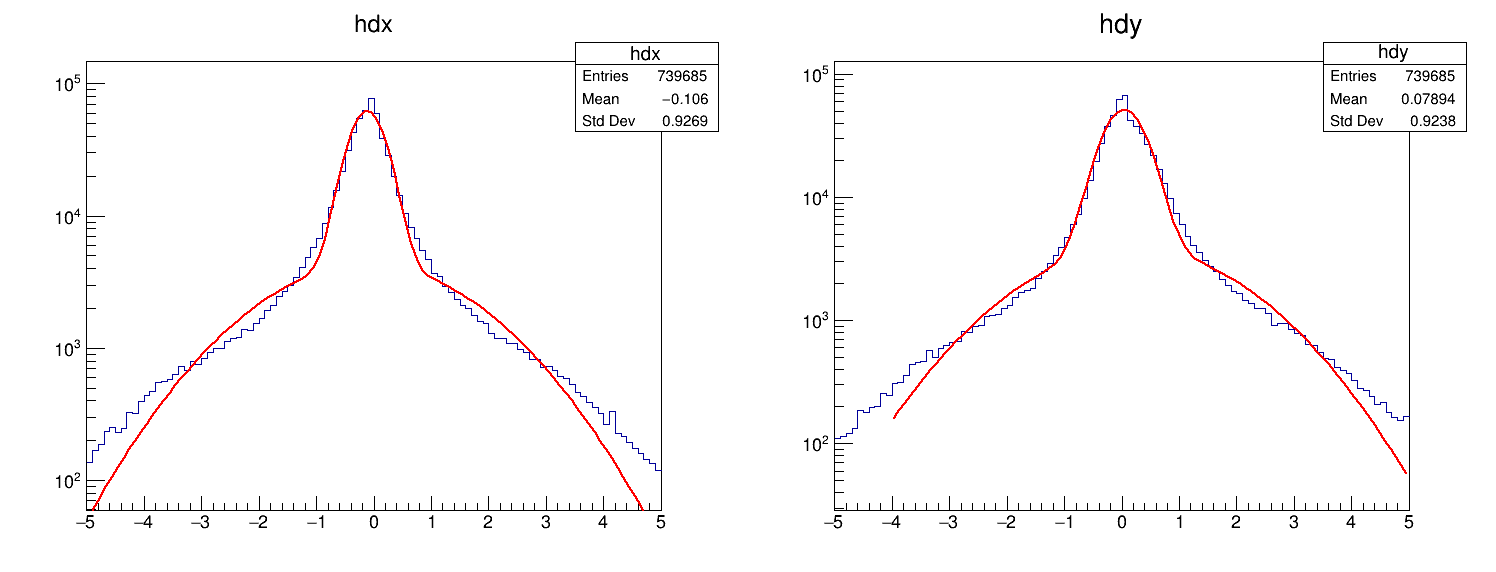

 FCN=4705.67 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=6.21942e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.54634e+04   1.38492e+02  -7.62323e-01   5.99034e-06
   2  Mean        -9.67985e-02   5.85477e-04  -8.26779e-06   2.03054e+00
   3  Sigma        2.86947e-01   6.64184e-04  -9.23456e-06   2.20482e+00
0.286947
 FCN=15135.7 FROM MIGRAD    STATUS=CONVERGED     578 CALLS         579 TOTAL
                     EDM=1.17772e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   3.4 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.77320e+04   1.26748e+02  -1.06425e-01  -1.80187e-06
   2  p1          -1.09032e-01   5.16957e-04   4.75927e-07   6.36386e-0

Warning in <TFile::Append>: Replacing existing TH1: hdx (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hdy (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dXdY


In [25]:
TH1D* hdX = new TH1D("hdx", "hdx", 100, -5, 5); 
TH1D* hdY = new TH1D("hdy", "hdy", 100, -5, 5); 

for(Long64_t j = 0; j < NEntry; j++){
    Data -> GetEntry(j); 
    hdX -> Fill(x[0] - Fitxk * z_x[0] - Fitxb); 
    hdY -> Fill(y[0] - Fityk * z_y[0] - Fityb); 
}

TF1 *FithdX1 = new TF1("FithdX1","gaus"); 
TF1 *FithdX  = new TF1("FithdX","gaus(0)+gaus(3)", -5, 5); 

hdX -> Fit("FithdX1", "NR", "", -0.5, 0.5); 
Double_t sigma = FithdX1 -> GetParameter(2); 
Double_t meanX = FithdX1 -> GetParameter(1); 

std::cout<<sigma<<std::endl; 
FithdX -> SetParameter(2,    sigma);
FithdX -> SetParameter(5,4 * sigma);
FithdX -> SetParameter(1,    meanX); 
FithdX -> SetParameter(4,    meanX); 
hdX -> Fit("FithdX", "NR", "", -5, 5); 

TF1 *FithdY1 = new TF1("FithdY1","gaus"); 
TF1 *FithdY  = new TF1("FithdY","gaus(0)+gaus(3)", -5, 5); 

hdY -> Fit("FithdY1", "R", "", -0.1, 0.9); 
Double_t sigmaY = FithdY1 -> GetParameter(2); 
Double_t meanY  = FithdY1 -> GetParameter(1); 

FithdY -> SetParameter(2,    sigmaY); 
FithdY -> SetParameter(1,     meanY); 
FithdY -> SetParameter(4,     meanY); 
FithdY -> SetParameter(5,    sigmaY); 
hdY    -> Fit("FithdY", "R", "", -4, 5); 


TCanvas *dXdY = new TCanvas("dXdY", "dXdY", 1500, 600); 
dXdY -> Divide(2, 1); 
dXdY -> cd(1) ->SetLogy(); 
hdX -> Draw(); 
FithdX -> Draw("SAME"); 
dXdY -> cd(2) ->SetLogy(); 
hdY -> Draw(); 
//FithdY -> Draw("SAME"); 
dXdY -> Draw(); 

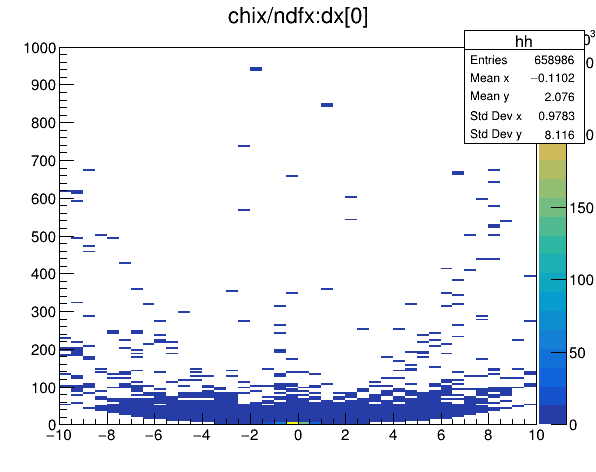

In [5]:
TCanvas *c1 = new TCanvas("c1", "c1", 600, 500); 
Data->Draw("chix/ndfx:dx[0]>>hh(40,-10,10,200,0,1000)","","colz"); 
c1->Draw();//从chi2/ndf图上可看出，部分事件的径迹拟合误差很大，这部分要在后续数据处理中去掉。

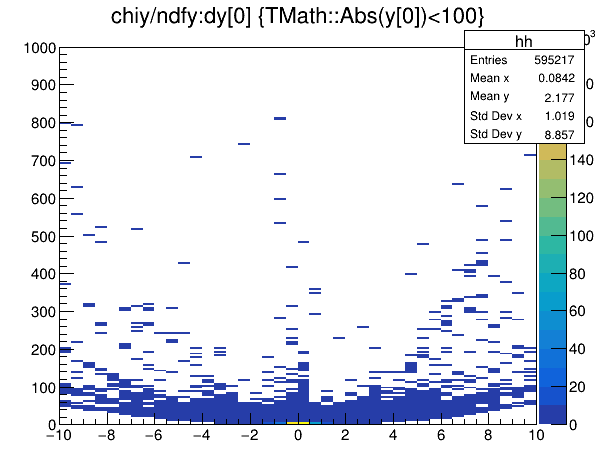

In [6]:
Data->Draw("chiy/ndfy:dy[0]>>hh(40,-10,10,200,0,1000)","TMath::Abs(y[0])<100","colz"); 

c1->Draw();//从chi2/ndf图上可看出，部分事件的径迹拟合误差很大，这部分要在后续数据处理中去掉。